In [109]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [110]:
# train-images-idx3-ubyte.gz	训练集图片 - 55000 张 训练图片, 5000 张 验证图片
# train-labels-idx1-ubyte.gz	训练集图片对应的数字标签
# t10k-images-idx3-ubyte.gz	测试集图片 - 10000 张 图片
# t10k-labels-idx1-ubyte.gz	测试集图片对应的数字标签
# 下载下来的数据集被分成两部分：60000行的训练数据集（mnist.train）和10000行的测试数据集（mnist.test）。
# 这样的切分很重要，在机器学习模型设计时必须有一个单独的测试数据集不用于训练而是用来评估这个模型的性能，
# 从而更加容易把设计的模型推广到其他数据集上（泛化）。

# 正如前面提到的一样，每一个MNIST数据单元有两部分组成：一张包含手写数字的图片和一个对应的标签。
# 我们把这些图片设为“xs”，把这些标签设为“ys”。训练数据集和测试数据集都包含xs和ys，
# 比如训练数据集的图片是 mnist.train.images ，训练数据集的标签是 mnist.train.labels。
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [111]:
# 计算每一次层网络
def add_layer(inputs, in_size, out_size, activation_function=None):
    weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    wx_b = tf.matmul(inputs, weights) + biases
    return wx_b if activation_function is None else activation_function(wx_b,)
# xs ys为一个占位符 用于得到传递进来的真实的训练样本 
# 可在运行时，通过 Session.run 的函数的 feed_dict 参数指定
xs = tf.placeholder(tf.float32, [None, 28*28])
ys = tf.placeholder(tf.float32, [None, 10])

# 它能给出某个tensor对象在某一维上的其数据最大值所在的索引值。由于标签向量是由0,1组成，
# 因此最大值1所在的索引位置就是类别标签，比如tf.argmax(y,1)返回的是模型对于任一输入x预测到的标签值，
# 而 tf.argmax(y_,1) 代表正确的标签，我们可以用 tf.equal 来检测我们的预测是否真实标签匹配
# (索引位置一样表示匹配)
def compute_accuracy(v_xs, v_ys):
    global prediction
#     feed入测试集数据
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return sess.run(accuracy, feed_dict={xs:v_xs, ys:v_ys})

# 五层的神经网络 前四层每层有50个神经元 最后一层输出层 有10个 代表所属0-9数字的概率大小
layer1 = add_layer(xs, 784, 50, activation_function = tf.nn.relu)
layer2 = add_layer(layer1, 50, 50, activation_function = tf.nn.sigmoid)
layer3 = add_layer(layer2, 50, 50, activation_function = tf.nn.relu)
layer4 = add_layer(layer3, 50, 50, activation_function = tf.nn.tanh)
# 最后一层使用softmax多元分类器 判定所属数字的概率大小
prediction = add_layer(layer4, 50, 10, activation_function = tf.nn.softmax)

# prediction 是我们预测的概率分布, ys 是实际的分布（我们输入的one-hot vector)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), 
                              reduction_indices=[1]))

# 最速下降法让交叉熵下降，学习率0.05
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

step: 0 ,  0.0907
step: 1000 ,  0.4625
step: 2000 ,  0.5595
step: 3000 ,  0.6265
step: 4000 ,  0.6653
step: 5000 ,  0.7106
step: 6000 ,  0.7474
step: 7000 ,  0.7628
step: 8000 ,  0.7799
step: 9000 ,  0.7987
step: 10000 ,  0.8107
step: 11000 ,  0.8184
step: 12000 ,  0.8236
step: 13000 ,  0.8299
step: 14000 ,  0.8393
step: 15000 ,  0.8424
step: 16000 ,  0.848
step: 17000 ,  0.852
step: 18000 ,  0.8514
step: 19000 ,  0.8577
step: 20000 ,  0.8612
step: 21000 ,  0.8616
step: 22000 ,  0.8667
step: 23000 ,  0.8653
step: 24000 ,  0.868
step: 25000 ,  0.8681
step: 26000 ,  0.8694
step: 27000 ,  0.867
step: 28000 ,  0.8707
step: 29000 ,  0.8755
step: 30000 ,  0.8769
step: 31000 ,  0.8766
step: 32000 ,  0.8756
step: 33000 ,  0.8799
step: 34000 ,  0.8779
step: 35000 ,  0.8782
step: 36000 ,  0.8807
step: 37000 ,  0.8812
step: 38000 ,  0.8811
step: 39000 ,  0.8822
step: 40000 ,  0.8802
step: 41000 ,  0.8832
step: 42000 ,  0.8833
step: 43000 ,  0.8837
step: 44000 ,  0.8826
step: 45000 ,  0.883
step: 

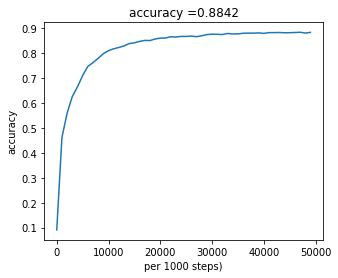

In [116]:
with tf.Session() as sess:
#     初始化我们创建的变量
    sess.run(tf.global_variables_initializer())
    steps = []
    accuracy_s = []
    for i in range(50000):
        batch_xs, batch_ys = mnist.train.next_batch(200)
#         训练模型 
        sess.run(layer1,  feed_dict = {xs: batch_xs, ys: batch_ys})
    
        sess.run(train_step, feed_dict = {xs: batch_xs, ys:batch_ys})
        if i % 1000 ==0:
            accuracy = compute_accuracy(mnist.test.images, mnist.test.labels)
            accuracy_s.append(accuracy)
            steps.append(i)
            print ("step:",i,", ",accuracy)
       
    plt.plot(steps,accuracy_s)
    plt.ylabel('accuracy')
    plt.xlabel('per 1000 steps)')
    plt.title("accuracy =" + str(accuracy_s[-1]))
    plt.show()

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# 一次batch的数据 200条
batch_xs.shape, batch_ys.shape

((200, 784), (200, 10))

In [54]:
batch_ys[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

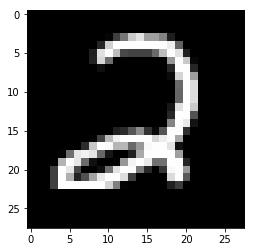

In [101]:
index = 9
plt.imshow(batch_xs[index].reshape(28,28))

In [79]:
image.shape

(249, 354)